<a href="https://colab.research.google.com/github/metalicznyposmak/MLBootcamp1/blob/main/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import sklearn

sklearn.__version__

'1.6.1'

#Wygenerowanie danych

In [6]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [100.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [7]:
  df = df_raw.copy()
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


#Sprawdzenie braków

In [8]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [9]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [10]:
df.isnull().sum().sum()

np.int64(5)

In [11]:
df.isnull().sum() / len(df)

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


In [12]:
from sklearn.impute import SimpleImputer

# Strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan)
imputer.fit(df[['weight']])

SimpleImputer()

In [13]:
df['weight']

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [14]:
imputer.statistics_

array([415.])

In [15]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [16]:
df['weight'] = imputer.transform(df[['weight']])

In [17]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[100.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [20]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [22]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [23]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [24]:
pd.isnull(df['weight'])

,weight
0,False
1,False
2,False
3,True
4,False
5,True


In [25]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [26]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [27]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [28]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [29]:
df.fillna(value='brak',)

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [30]:
df['size'].fillna(value='L', inplace=True)
df

/tmp/ipython-input-4195594293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna(value='L', inplace=True)


,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [31]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,100.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


#Braki danych w szeregach czasowych

In [32]:
data = {
    'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]
}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


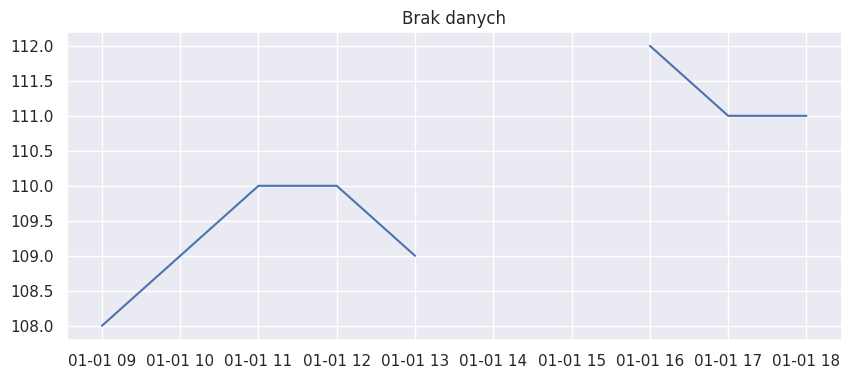

In [33]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('Brak danych')
_ = plt.plot(df.price)

In [34]:
import plotly.express as px
df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - brak danych')

In [38]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - brak danych')

In [39]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - wstawienie stalej wartości')

In [44]:
df_plotly = df.reset_index()
df_plotly['price_mean'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_mean', width=600, height=400, title='Szeregi czasowe - wstawienie średniej')


In [47]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].interpolate())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - interpolacja')

In [48]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - forward fill')

/tmp/ipython-input-421560939.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [50]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].bfill()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - backward fill')

AttributeError: 'function' object has no attribute 'bfill'